In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [33]:
RDF = pd.read_csv('RatingsWebscrape.csv') #Loading train dataset

In [34]:
RDF

,Unnamed: 0,Comment,Rating
0,0,Just unboxed the phone. Seems to be a better o...,5.0
1,1,"This is perfect phone, good speed, decent spec...",5.0
2,2,A very satisfying experience with the device s...,5.0
3,3,It's a real monster. Everything is awesome fro...,5.0
4,4,I am using this phone for the last one week an...,5.0
...,...,...,...
22167,22167,Switching from a windows laptop to a MacBook w...,5.0
22168,22168,Superb I am happy to have this but only one th...,5.0
22169,22169,"top class, must buy",5.0
22170,22170,Value for money Best combination of 8gb ram 51...,4.0


In [35]:
RDF.shape

(22172, 3)

### Getting general information of the data.

In [36]:
RDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22172 entries, 0 to 22171
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22172 non-null  int64  
 1   Comment     22150 non-null  object 
 2   Rating      22172 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 519.8+ KB


#### Finding the null values in the columns of dataset

In [37]:
RDF.isnull().sum()

Unnamed: 0     0
Comment       22
Rating         0
dtype: int64

There are 22 null values present in comment column

#### Checking for blank spaces, random characters in each column

In [38]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in RDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((trainDF[c] == s).sum())

  in Unnamed: 0 =  0
? in Unnamed: 0 =  0
- in Unnamed: 0 =  0
 ? in Unnamed: 0 =  0
 - in Unnamed: 0 =  0
?  in Unnamed: 0 =  0
-  in Unnamed: 0 =  0
 ?  in Unnamed: 0 =  0
 -  in Unnamed: 0 =  0
NA in Unnamed: 0 =  0
N/A in Unnamed: 0 =  0
 NA in Unnamed: 0 =  0
 N/A in Unnamed: 0 =  0
  in Comment =  0
? in Comment =  0
- in Comment =  0
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  0
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


There are no blank spaces, random characters in the columns

In [39]:
RDF[RDF['Comment'].isnull()].index

Int64Index([ 4099,  4332,  4333,  4525,  4557,  4560,  4653,  4731,  4776,
             4779,  4833,  4848,  4892,  6104,  6125,  6277,  6300,  6321,
             6435,  6527, 11339, 18050],
           dtype='int64')

### Dataset Description

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

Columns:

Comment: The Comments on various products

Rating: User Rating out of 5.


### Cleaning Dataset.

#### Dropping entire rows with Null values since the data lost will only amount to 0.099% of total data

In [40]:
RDF.dropna(inplace=True)

In [41]:
RDF.shape

(22150, 3)

#### Dropping the 'Unnamed: 0' column since it is not required

In [42]:
RDF.drop(columns = 'Unnamed: 0',inplace=True)

In [43]:
RDF

,Comment,Rating
0,Just unboxed the phone. Seems to be a better o...,5.0
1,"This is perfect phone, good speed, decent spec...",5.0
2,A very satisfying experience with the device s...,5.0
3,It's a real monster. Everything is awesome fro...,5.0
4,I am using this phone for the last one week an...,5.0
...,...,...
22167,Switching from a windows laptop to a MacBook w...,5.0
22168,Superb I am happy to have this but only one th...,5.0
22169,"top class, must buy",5.0
22170,Value for money Best combination of 8gb ram 51...,4.0


In [44]:
for c in RDF.drop(columns = ['Comment'],axis=1):
        print(RDF[c].value_counts())

5.0    5971
4.0    4488
3.0    4038
1.0    3868
2.0    3785
Name: Rating, dtype: int64


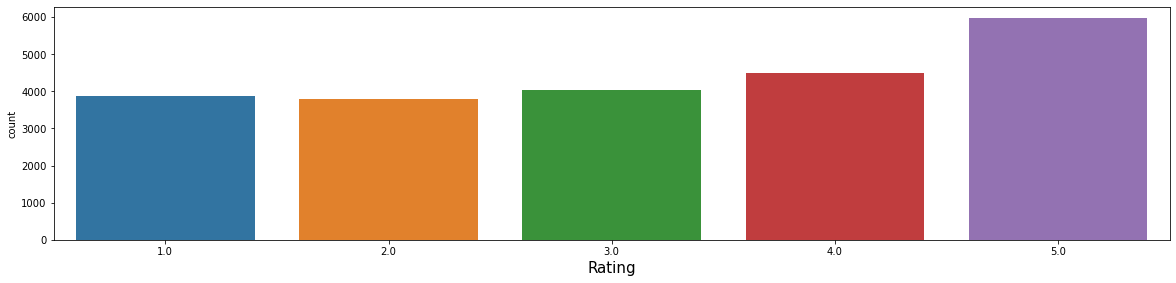

In [45]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in RDF.drop(columns = ['Comment'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(trainDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

The rating classes are fairly balanced

In [46]:
#Creating a length column with records of total string length of each comment text

In [47]:
RDF['Stringlength'] = RDF['Comment'].str.len()
RDF.head()

,Comment,Rating,Stringlength
0,Just unboxed the phone. Seems to be a better o...,5.0,232
1,"This is perfect phone, good speed, decent spec...",5.0,153
2,A very satisfying experience with the device s...,5.0,800
3,It's a real monster. Everything is awesome fro...,5.0,376
4,I am using this phone for the last one week an...,5.0,1132


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

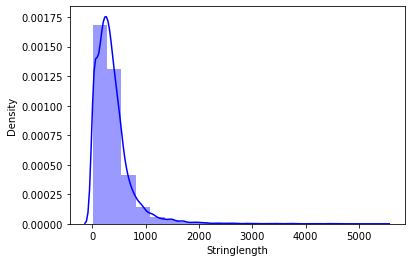

In [48]:
#Distribution of string length
sns.distplot(RDF.Stringlength, bins=20, color = 'blue')

####  most reviews are between 0 and 1000 words

### Data Pre Processing

In [49]:
import re
import string

In [50]:
# Convert all messages to lower case
RDF['Comment'] = RDF['Comment'].str.lower()


RDF['Comment'] = RDF['Comment'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
RDF['Comment'] = RDF['Comment'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


RDF['Comment'] = RDF['Comment'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
RDF['Comment'] = RDF['Comment'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

RDF['Comment'] = RDF['Comment'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


RDF['Comment'] = RDF['Comment'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

RDF['Comment'] = RDF['Comment'].str.replace(r'[\_]',' ') #removing underscore characters

RDF['Comment'] = RDF['Comment'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

RDF['Comment'] = RDF['Comment'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

RDF['Comment'] = RDF['Comment'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace


In [51]:
RDF

,Comment,Rating,Stringlength
0,just unboxed the phone seems to be better one ...,5.0,232
1,this is perfect phone good speed decent specs ...,5.0,153
2,a very satisfying experience with the device s...,5.0,800
3,it a real monster everything is awesome from d...,5.0,376
4,i am using this phone for the last one week an...,5.0,1132
...,...,...,...
22167,switching from windows laptop to macbook was h...,5.0,249
22168,superb am happy to have this but only one thin...,5.0,156
22169,top class must buy,5.0,19
22170,value for money best combination of numgb ram ...,4.0,132


In [52]:
import nltk
from nltk.corpus import stopwords,wordnet

In [53]:
from nltk.stem import WordNetLemmatizer

In [54]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
RDF['Comment'] = RDF['Comment'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [56]:
lem=WordNetLemmatizer()
RDF['Comment'] = RDF['Comment'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [57]:
RDF

,Comment,Rating,Stringlength
0,unboxed phone seems better one price segment c...,5.0,232
1,perfect phone good speed decent spec outstandi...,5.0,153
2,satisfying experience device far pro num long ...,5.0,800
3,real monster everything awesome display proces...,5.0,376
4,using phone last one week noticed positive neg...,5.0,1132
...,...,...,...
22167,switching window laptop macbook hard sort conf...,5.0,249
22168,superb happy one thing flipkart may offer bag ...,5.0,156
22169,top class must buy,5.0,19
22170,value money best combination numgb ram numgb s...,4.0,132


In [58]:
RDF['Cleaned_Stringlength'] = RDF['Comment'].str.len()
RDF.head()

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,unboxed phone seems better one price segment c...,5.0,232,150
1,perfect phone good speed decent spec outstandi...,5.0,153,103
2,satisfying experience device far pro num long ...,5.0,800,564
3,real monster everything awesome display proces...,5.0,376,258
4,using phone last one week noticed positive neg...,5.0,1132,741


In [59]:
RDF

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,unboxed phone seems better one price segment c...,5.0,232,150
1,perfect phone good speed decent spec outstandi...,5.0,153,103
2,satisfying experience device far pro num long ...,5.0,800,564
3,real monster everything awesome display proces...,5.0,376,258
4,using phone last one week noticed positive neg...,5.0,1132,741
...,...,...,...,...
22167,switching window laptop macbook hard sort conf...,5.0,249,141
22168,superb happy one thing flipkart may offer bag ...,5.0,156,81
22169,top class must buy,5.0,19,18
22170,value money best combination numgb ram numgb s...,4.0,132,122


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

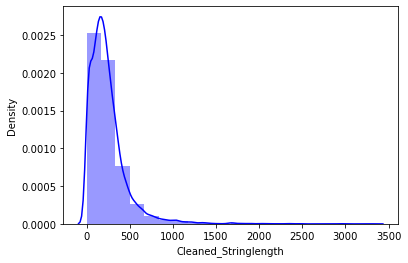

In [60]:
#Distribution of cleaned string length
sns.distplot(RDF.Cleaned_Stringlength, bins=20, color = 'blue')

#### word density has been reduced

In [63]:
from wordcloud import WordCloud

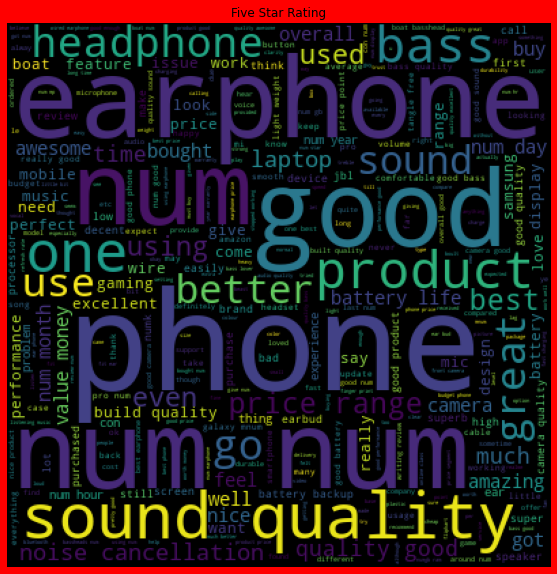

In [66]:
five=RDF['Comment'][RDF['Rating']==5]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(five))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Five Star Rating')
plt.show()

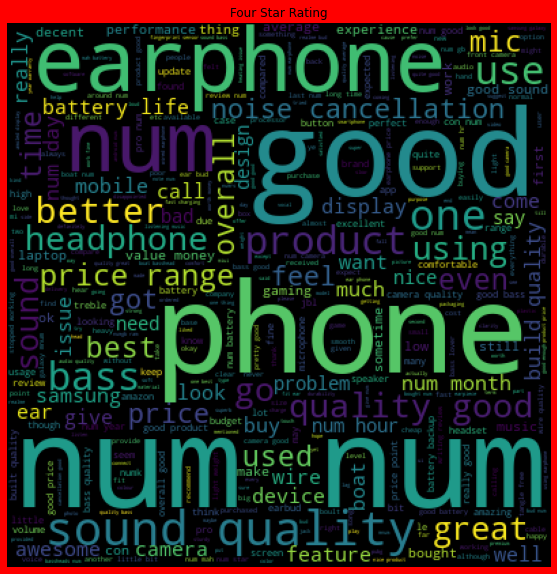

In [67]:
four=RDF['Comment'][RDF['Rating']==4]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(four))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Four Star Rating')
plt.show()

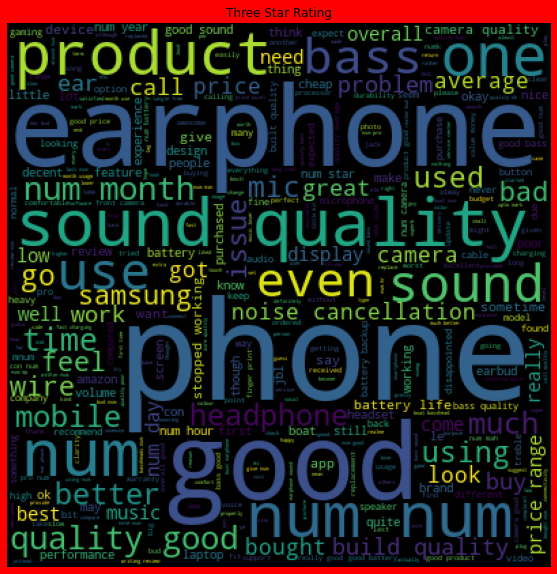

In [69]:
three=RDF['Comment'][RDF['Rating']==3]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(three))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Three Star Rating')
plt.show()

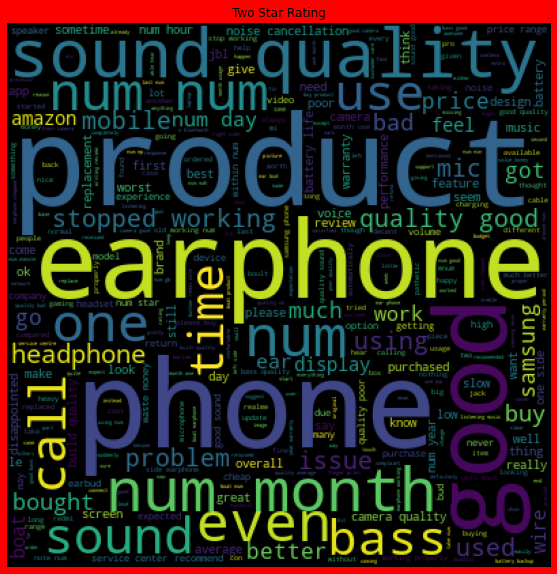

In [70]:
two=RDF['Comment'][RDF['Rating']==2]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(two))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Two Star Rating')
plt.show()

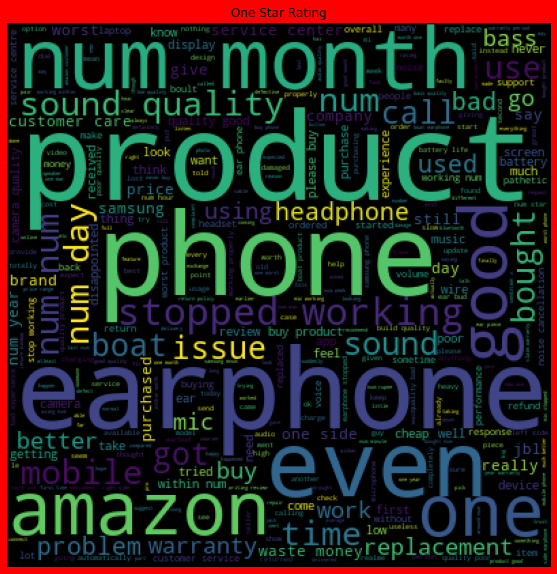

In [71]:
one=RDF['Comment'][RDF['Rating']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(one))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='One Star Rating')
plt.show()

Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they  do not contribute to model building

In [76]:
RDF.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [77]:
from collections import Counter

In [78]:
fiv = Counter(",".join(RDF[RDF['Rating']==5]["Comment"]).split()).most_common(10)
fr = Counter(",".join(RDF[RDF['Rating']==4]["Comment"]).split()).most_common(10)
thr = Counter(",".join(RDF[RDF['Rating']==3]["Comment"]).split()).most_common(10)
tw = Counter(",".join(RDF[RDF['Rating']==2]["Comment"]).split()).most_common(10)
one = Counter(",".join(RDF[RDF['Rating']==1]["Comment"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Words and Ratings,with their counts")
Countdf['Five Star Words']=fiv
Countdf['Four Star Words']=fr
Countdf['Three Star Words']=thr
Countdf['Two Star Words']=tw
Countdf['One Star Words']=one
Countdf.head(10)

TOP 10 Words and Ratings,with their counts


,Five Star Words,Four Star Words,Three Star Words,Two Star Words,One Star Words
0,"(num, 10271)","(num, 9947)","(num, 7194)","(num, 4721)","(num, 5455)"
1,"(good, 4675)","(good, 5121)","(good, 3534)","(quality, 2300)","(product, 2836)"
2,"(quality, 3978)","(quality, 3658)","(quality, 3123)","(good, 2047)","(phone, 2236)"
3,"(sound, 2935)","(sound, 2603)","(sound, 2229)","(phone, 1622)","(quality, 2086)"
4,"(earphone, 2858)","(phone, 2344)","(phone, 1986)","(sound, 1585)","(earphone, 1755)"
5,"(phone, 2688)","(earphone, 2093)","(earphone, 1675)","(product, 1500)","(one, 1525)"
6,"(price, 2183)","(bass, 2042)","(bass, 1457)","(earphone, 1356)","(working, 1504)"
7,"(bass, 2066)","(price, 1834)","(one, 1333)","(one, 1106)","(good, 1336)"
8,"(product, 1988)","(one, 1572)","(product, 1324)","(month, 989)","(sound, 1304)"
9,"(one, 1769)","(battery, 1547)","(camera, 1116)","(working, 906)","(month, 1282)"


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [82]:
features = tf_vec.fit_transform(RDF['Comment'])

In [83]:
X = features
y=RDF['Rating']

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Balancing out classes in Label column using SMOTE technique.

In [87]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

### This is a Classification problem since Target column ('Rating') has Catergorical type of Data.


In [100]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7462319973205315 on random_state: 35


In [101]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 35)

In [102]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss

In [103]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [104]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

In [105]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
pc= PassiveAggressiveClassifier()

### Training the Models

In [106]:
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)

[21:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ComplementNB()

In [107]:
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

All Models have been trained.

### Logistic Regression Model Accuracy

In [108]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)


In [109]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[1402,  224,   93,   47,   24],
       [ 384, 1052,  223,   88,   50],
       [ 158,  254,  929,  217,  200],
       [  77,  117,  246,  885,  489],
       [  82,   60,  123,  348, 1185]], dtype=int64)

In [110]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.67      0.78      0.72      1790
         2.0       0.62      0.59      0.60      1797
         3.0       0.58      0.53      0.55      1758
         4.0       0.56      0.49      0.52      1814
         5.0       0.61      0.66      0.63      1798

    accuracy                           0.61      8957
   macro avg       0.61      0.61      0.61      8957
weighted avg       0.61      0.61      0.61      8957



### Random Forest Classifier Model Accuracy

In [112]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [113]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[1585,  103,   44,   29,   29],
       [ 171, 1375,  113,   62,   76],
       [ 101,  118, 1263,  136,  140],
       [  51,   56,  157, 1212,  338],
       [  58,   53,  102,  295, 1290]], dtype=int64)

In [114]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.81      0.89      0.84      1790
         2.0       0.81      0.77      0.79      1797
         3.0       0.75      0.72      0.73      1758
         4.0       0.70      0.67      0.68      1814
         5.0       0.69      0.72      0.70      1798

    accuracy                           0.75      8957
   macro avg       0.75      0.75      0.75      8957
weighted avg       0.75      0.75      0.75      8957



### Multinomial Naive Bayes Model Accuracy

In [116]:
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)

In [117]:
conf_matrx = confusion_matrix(y_test,MNBpred)

In [118]:
conf_matrx

array([[1341,  211,  156,   59,   23],
       [ 434,  908,  289,  115,   51],
       [ 204,  181,  965,  227,  181],
       [ 111,   88,  248,  938,  429],
       [ 107,   54,  126,  401, 1110]], dtype=int64)

In [119]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.61      0.75      0.67      1790
         2.0       0.63      0.51      0.56      1797
         3.0       0.54      0.55      0.54      1758
         4.0       0.54      0.52      0.53      1814
         5.0       0.62      0.62      0.62      1798

    accuracy                           0.59      8957
   macro avg       0.59      0.59      0.58      8957
weighted avg       0.59      0.59      0.58      8957



### Complement Naive Bayes Model Accuracy

In [121]:
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)

In [122]:
conf_matrx = confusion_matrix(y_test,CNBpred)

In [123]:
conf_matrx

array([[1510,  115,   74,   45,   46],
       [ 552,  881,  179,  105,   80],
       [ 280,  162,  832,  216,  268],
       [ 152,   86,  151,  877,  548],
       [ 142,   51,   81,  233, 1291]], dtype=int64)

In [124]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.57      0.84      0.68      1790
         2.0       0.68      0.49      0.57      1797
         3.0       0.63      0.47      0.54      1758
         4.0       0.59      0.48      0.53      1814
         5.0       0.58      0.72      0.64      1798

    accuracy                           0.60      8957
   macro avg       0.61      0.60      0.59      8957
weighted avg       0.61      0.60      0.59      8957



### Passive Aggressive Classifier Model Accuracy

In [126]:
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)

In [127]:
conf_matrx = confusion_matrix(y_test,pcpred)

In [128]:
conf_matrx

array([[1454,  140,   91,   74,   31],
       [ 130, 1370,  136,  101,   60],
       [  70,  143, 1227,  190,  128],
       [  65,   94,  212, 1155,  288],
       [  58,  109,  189,  407, 1035]], dtype=int64)

In [129]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.82      0.81      0.82      1790
         2.0       0.74      0.76      0.75      1797
         3.0       0.66      0.70      0.68      1758
         4.0       0.60      0.64      0.62      1814
         5.0       0.67      0.58      0.62      1798

    accuracy                           0.70      8957
   macro avg       0.70      0.70      0.70      8957
weighted avg       0.70      0.70      0.70      8957



### XGB Classifier Model Accuracy

In [131]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [132]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[1438,  202,   77,   28,   45],
       [ 304, 1133,  192,   94,   74],
       [ 146,  252,  981,  197,  182],
       [  49,  105,  208,  998,  454],
       [  61,   80,   98,  264, 1295]], dtype=int64)

In [133]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.72      0.80      0.76      1790
         2.0       0.64      0.63      0.63      1797
         3.0       0.63      0.56      0.59      1758
         4.0       0.63      0.55      0.59      1814
         5.0       0.63      0.72      0.67      1798

    accuracy                           0.65      8957
   macro avg       0.65      0.65      0.65      8957
weighted avg       0.65      0.65      0.65      8957



### AdaBoost Classifier Model Accuracy

In [135]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [136]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[1126,  428,  124,   50,   62],
       [ 546,  617,  318,  194,  122],
       [ 204,  462,  492,  368,  232],
       [  88,  209,  298,  726,  493],
       [  78,  141,  136,  513,  930]], dtype=int64)

In [137]:
print(accu)

              precision    recall  f1-score   support

         1.0       0.55      0.63      0.59      1790
         2.0       0.33      0.34      0.34      1797
         3.0       0.36      0.28      0.31      1758
         4.0       0.39      0.40      0.40      1814
         5.0       0.51      0.52      0.51      1798

    accuracy                           0.43      8957
   macro avg       0.43      0.43      0.43      8957
weighted avg       0.43      0.43      0.43      8957



### Model Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score as cvs

#### Logistic Regression

In [140]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.5696198291743426


#### Random Forest Classifier

In [145]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.7293585664042874


#### Multinomial Naive Bayes

In [141]:
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

0.5515324066320549


#### Complement Naive Bayes

In [142]:
print(cvs(CNB,smt_x,smt_y,cv=5).mean())

0.5719979902863842


#### Passive Aggressive Classifier

In [143]:
print(cvs(pc,smt_x,smt_y,cv=5).mean())

0.6885613800033494


#### XGB Classifier

In [144]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

[21:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Adaboost Classifier

In [146]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.3980907720649807


### ROC AUC curves 

In [147]:
import scikitplot as sktplt

In [159]:
lr_prob = LOGR.predict_proba(x_test)
rf_prob = RFC.predict_proba(x_test)
adbc_prob = adbc.predict_proba(x_test)
xgbc_prob = XGBC.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

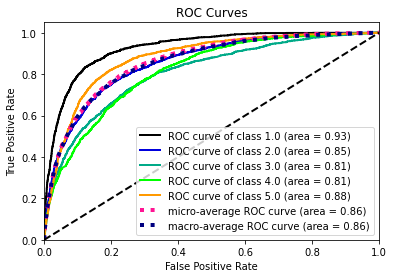

In [151]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

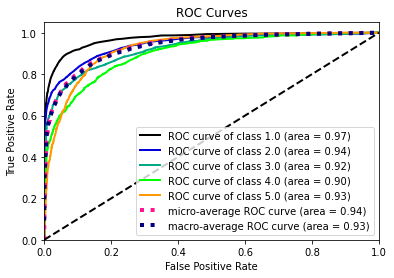

In [152]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

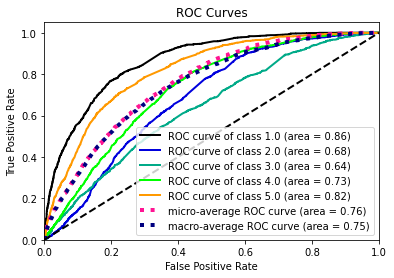

In [153]:
sktplt.metrics.plot_roc(y_test,adbc_prob) # Ada Boost Classifier ROC Curve


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

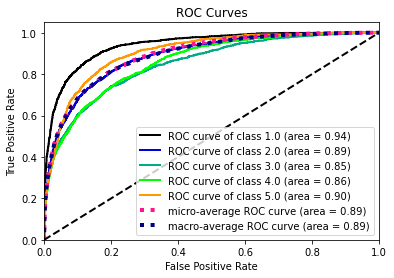

In [154]:
sktplt.metrics.plot_roc(y_test,xgbc_prob) #Xgb Classifier ROC Curve


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

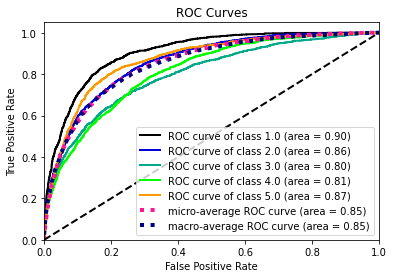

In [155]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

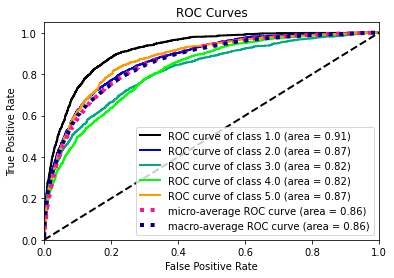

In [156]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves


### ROC AUC Scores

#### Logistic Regression

In [165]:
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.856201546227344

#### Multinomial Naive Bayes

In [167]:
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.8490587707773576

#### Complement Naive Bayes

In [168]:
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

0.858399172298617

#### Adaboost Classifier

In [169]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo')

0.745466211649427

#### XGB Classifier

In [170]:
roc_auc_score(y_test,xgbc_prob,multi_class='ovo')

0.888636918334397

#### Random Forest Classifier

In [172]:
roc_auc_score(y_test,rf_prob,multi_class='ovo')

0.9331741740327718

### Based on comparing the above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores, it is determined that Random Forest Classifier is the best model for the dataset.

### Hyper Parameter Tuning

In [189]:
parameter = {'n_estimators':[400,500,600],'max_depth': [80,90,95],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [190]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

<IPython.core.display.Javascript object>

In [191]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 95],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 30],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [400, 500, 600]},
             verbose=1)

In [192]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 95,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [194]:
Best_mod = RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth= 95, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

70.5593390644189


array([[1558,  105,   51,   20,   56],
       [ 288, 1211,  127,   48,  123],
       [ 150,  161, 1099,  112,  236],
       [  68,   73,  144, 1052,  477],
       [  86,   38,   54,  220, 1400]], dtype=int64)

### Random Forest Classifier has an accuracy of 70.55%

### Saving The Model

In [195]:
import joblib
joblib.dump(Best_mod,"BestModelRatingsClassifier.pkl")

['BestModelRatingsClassifier.pkl']

#### Loading The Model

In [200]:
mod=joblib.load("BestModelRatingsClassifier.pkl")

In [201]:
mod.predict(x_test)

array([2., 1., 5., ..., 1., 3., 2.])

In [211]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y[0:8957]})
Prediction_accuracy.head()

,Predictions,Actual Values
0,2.0,5.0
1,1.0,5.0
2,5.0,5.0
3,2.0,5.0
4,2.0,5.0
